##### General Trends and Exploratory Data Analysis
<small>This section delves into understanding the underlying patterns and trends within the dataset. **Exploratory Data Analysis (EDA)** serves as a crucial step in the data analysis process, allowing us to uncover insights that might not be immediately evident. We aim to analyze:<small> </br>


- **Overall Accident Volume:** Assess the total number of accidents within the dataset's timeframe to provide a foundational understanding of the data's scale.

</br>

•	**How many accidents occurred in the dataset’s time range?**


In [1]:
# Data processing and manipulation
import dask.dataframe as dd                         
import pandas as pd                                 
import numpy as np                                  
import re                                           

# Visualization libraries
import matplotlib.pyplot as plt                     
from matplotlib.ticker import StrMethodFormatter     
import seaborn as sns                              

# Machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder      

# Memory management
import gc                                         


In [2]:
# Load the dataset as a Dask DataFrame
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Compute the shape of the DataFrame
num_rows = df.shape[0].compute()                   # Total number of rows (accidents)
print(f"There are a total of {num_rows} accidents in the dataset's time range.")

There are a total of 7728394 accidents in the dataset's time range.


<hr style="border: 1px solid #ccc; margin: 20px 0;">

- **Temporal Trends:** Investigate trends over the years to determine whether accident rates are increasing or decreasing. This insight can be essential for identifying potential safety improvements or areas requiring more attention.

<br>
•	What is the trend in accidents over the years? Are accidents increasing or decreasing over time?



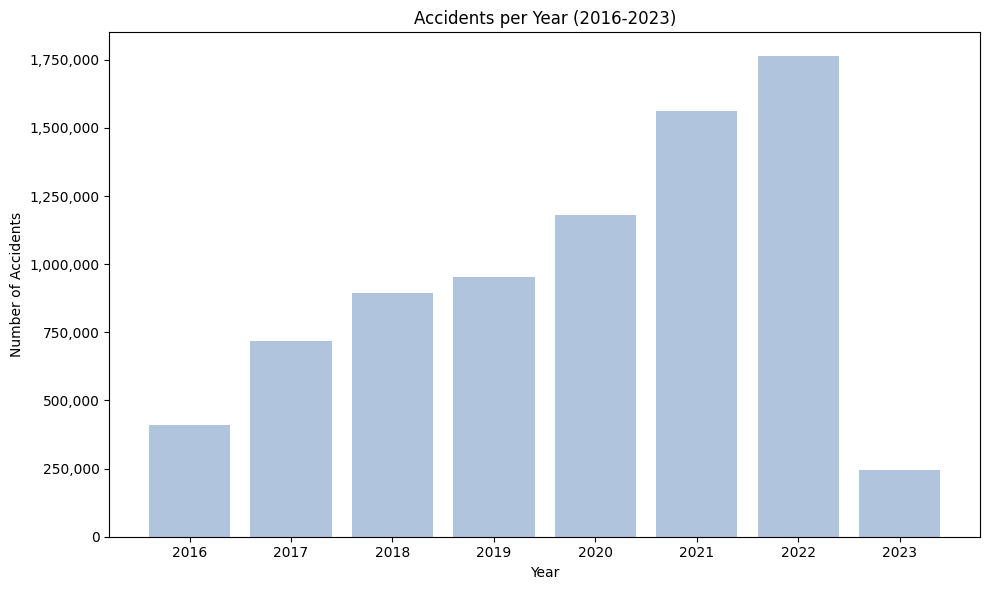

In [3]:
# Define a list of years for analysis
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize total accident count and dictionary for yearly counts
total_count = 0
yearly_counts = {}

# Count occurrences of accidents per year
for year in years:
    count = df['Start_Time'].str.contains(str(year)).sum().compute()
    yearly_counts[year] = count
    total_count += count
    #print(f"Accidents in {year}: {count}")

# Print total accidents from 2016 to 2023
#print(f"Total accidents from 2016 to 2023: {total_count}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.keys(), yearly_counts.values(), color='lightsteelblue')

# Format the Y-axis for readability
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Label axes and title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Year (2016-2023)')
plt.xticks(years)

plt.tight_layout()  # Adjust layout
plt.show()


<h5 style="font-size: 0.8em; font-weight: bold;">Accident Data Summary</h5>

<p>
    <span style="font-size: 0.8em;">
        - Accidents in 2016: 410,821<br>
        - Accidents in 2017: 718,093<br>
        - Accidents in 2018: 893,426<br>
        - Accidents in 2019: 954,303<br>
        - Accidents in 2020: 1,178,913<br>
        - Accidents in 2021: 1,563,753<br>
        - Accidents in 2022: 1,762,452<br>
        - Accidents in 2023: 246,633<br>
        - Total accidents from 2016 to 2023: 7,728,394
    </span>
</p>

<h5 style="font-size: 0.8em; font-weight: bold;">Analysis Summary</h5>

<p>
    <span style="font-size: 0.8em;">
        The analysis of accident data from 2016 to 2022 reveals a 
        consistent upward trend in the number of accidents each year. 
        This indicates a growing concern regarding road safety over the analyzed period.
    </span>
</p>

<p>
    <span style="font-size: 0.8em;">
        For 2023, the data is currently incomplete, 
        which prevents us from making a definitive conclusion about the total accidents for this year. 
        However, based on the observed trend, we anticipate that the number of accidents will continue to rise. 
        To address this potential issue, we plan to implement a 
        forecasting model to project the expected accident rates for 
        2023 and beyond.
    </span>
</p>

<hr style="border: 1px solid #ccc; margin: 20px 0;">

- **Seasonal Patterns:** Analyze the distribution of accidents across months and days of the week. Identifying seasonal trends can help in understanding when accidents are most likely to occur, aiding in resource allocation for traffic management and safety initiatives.



**•	What is the distribution of accidents across different months? Are there seasonal trends?**


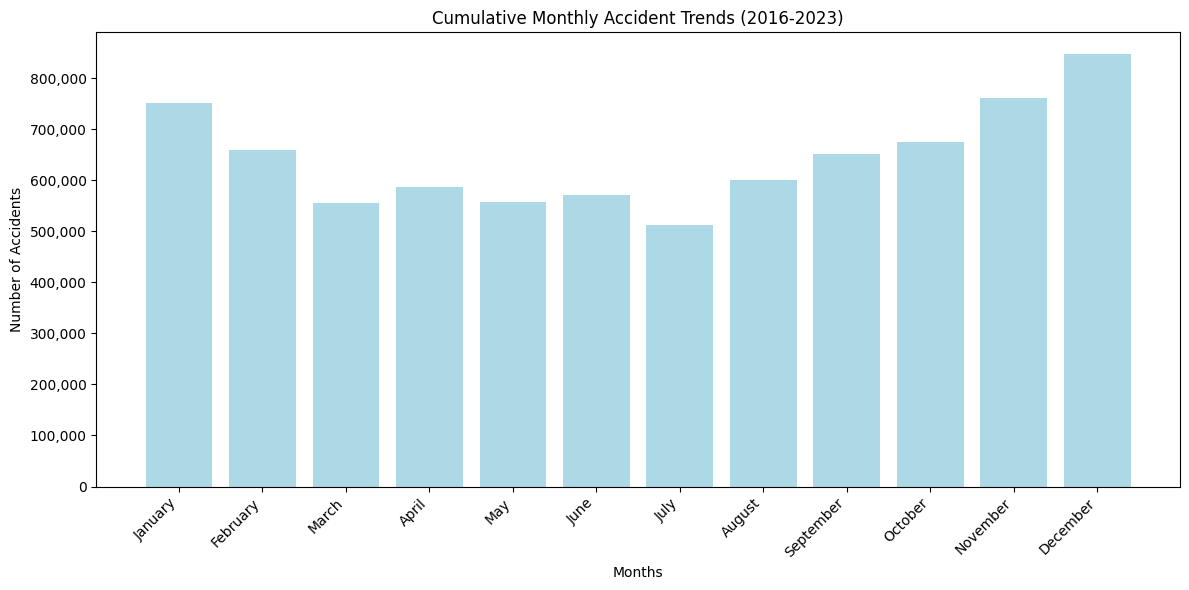

In [4]:
# List of years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize dictionary to hold total counts for each month
monthly_totals = {f"{str(month).zfill(2)}": 0 for month in range(1, 13)}

# For loop to count occurrences for each month across all years
for year in years:
    for month in range(1, 13):
        year_month = f"{year}-{str(month).zfill(2)}"  # Format as 'YYYY-MM'
        
        # Using Dask to compute the count
        count = (df['Start_Time'].str.contains(year_month).sum().compute())
        
        # Accumulate the count to the corresponding month
        monthly_totals[str(month).zfill(2)] += count

# Prepare data for plotting
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
values = list(monthly_totals.values())

# Plotting the total accidents per month
plt.figure(figsize=(12, 6))
plt.bar(months, values, color='lightblue')
plt.title('Cumulative Monthly Accident Trends (2016-2023)')
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format Y-axis
plt.tight_layout()
plt.show()

<h5 style="font-size: 0.8em;">Analysis of Seasonal Trends</h5>

<p style="font-size: 0.8em">
U.S. traffic accidents follow a clear seasonal trend,  with winter months (December and January) being the most hazardous, <br>
likely due to a combination of weather and holiday travel, while the summer months, particularly July, experience fewer accidents. <br>
This trend is crucial for public awareness, policy-making, and resource allocation for traffic safety initiatives.
</p>

In [ ]:
# List of years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

months = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

# Initialize dictionary to hold values for each month across the years
monthly_trends = {f"{str(month).zfill(2)}": [] for month in range(1, 13)}

# For loop to count occurrences for each month across all years
for year in years:
    for month in range(1, 13):
        year_month = f"{year}-{str(month).zfill(2)}"  # Format as 'YYYY-MM'
        count = df['Start_Time'].str.contains(year_month).sum().compute()
        
        # Append the count to the corresponding month list
        monthly_trends[str(month).zfill(2)].append(count) 

# Create a 3x4 grid for the subplots (3 rows and 4 columns)
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through each month in monthly_trends to generate bar charts
for i, month in enumerate(monthly_trends):
    axs[i].bar(years, monthly_trends[month], color='skyblue')
    
    # Get the month name from the months list based on the month number
    month_index = int(month) - 1  # Convert to 0-based index
    axs[i].set_title(f"{months[month_index]} Trends in Traffic Accidents (2016-2023)")
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Number of Accidents")
    axs[i].set_xticks(years)  # Ensure all years are labeled on the x-axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<p style="font-size: 0.8em">
The trend shows a general increase in accidents from 2016 to 2022, with a significant dip in 2020 likely due to COVID-19 lockdowns. Accidents rebounded sharply in 2021, and winter months (November, December, January) consistently show the most accidents. Notably, 2023 sees a decline in accidents for the early months (January to March) compared to previous years, possibly indicating improved safety measures or other factors. Summer months (July-September) are relatively stable with moderate growth.
</p>

<hr style="border: 1px solid #ccc; margin: 20px 0;">

- **Time of Day Analysis:** Explore at what times most accidents happen (morning, afternoon, night). This information can be invaluable for informing traffic safety campaigns and planning.


**•	Which days of the week are most accidents likely to occur?**


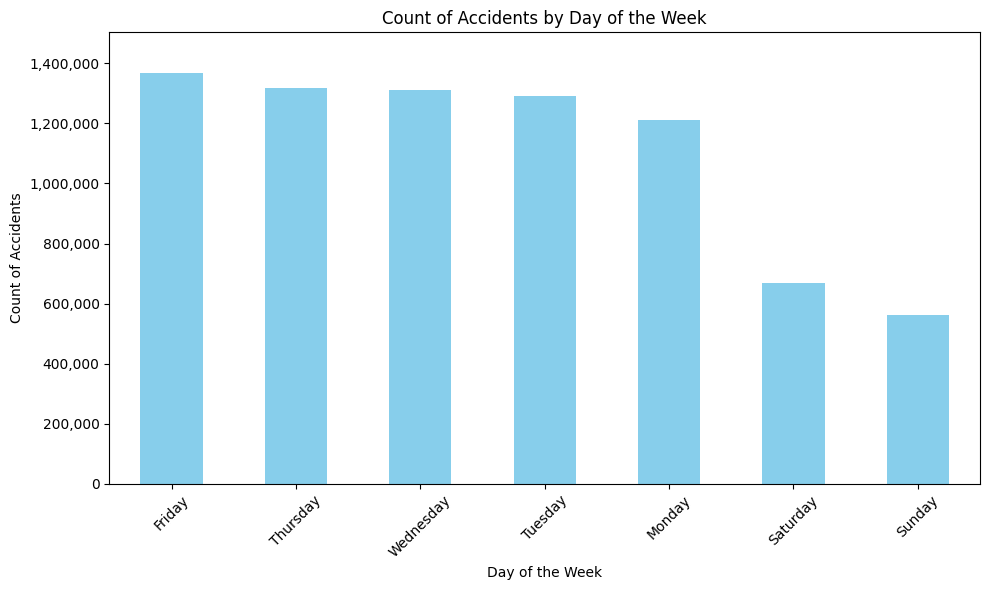

In [37]:
# Ensure 'Start_Time' is in datetime format, using mixed format to handle variations
df['Start_Time'] = dd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract only the date (removes the time)
df['date_only'] = df['Start_Time'].dt.date

# Extract the day of the week (e.g., 'Monday', 'Tuesday') and store in 'weekday' column
df['weekday'] = df['Start_Time'].dt.day_name()

# Create a new DataFrame with only the 'weekday' column
weekday_df = df[['weekday']]

# Count how many times each day appears and sort by counts in descending order
weekday_counts = weekday_df['weekday'].value_counts().compute().sort_values(ascending=False)

# Print the counts for each day
#print("Counts of each weekday:")
#print(weekday_counts)

# Plotting the counts
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)

# Set the y-axis limit to start from 0 and end at the maximum count
plt.ylim(0, weekday_counts.max() * 1.1)  # Optional padding above the max count

# Format the Y-axis for readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()  # Adjust layout
plt.show()

<p style="font-size: 0.8em;">
    Friday leads with the highest number of accidents (1.37 million), followed by Thursday, Wednesday, and Tuesday (around 1.3 million each), indicating that the mid-to-late workweek is the most accident-prone period.
    Monday also sees a high number of accidents (1.21 million), reflecting a busy start to the week.
    Saturday and especially Sunday have the fewest accidents, with Sunday at just 562,744, possibly due to lighter traffic and fewer commuters on weekends. In summary, weekdays, especially Friday, show the most accidents, while weekends, particularly Sunday, are the safest. This pattern aligns with typical traffic volumes and commuting patterns.
</p>

<hr style="border: 1px solid #ccc; margin: 20px 0;">


**•	At what time of day do most accidents happen (morning, afternoon, or night)?**

Counts of each time of day:
time_of_day
Afternoon    2884131
Morning      2631665
Night        1260209
Evening       952389
Name: count, dtype: int64


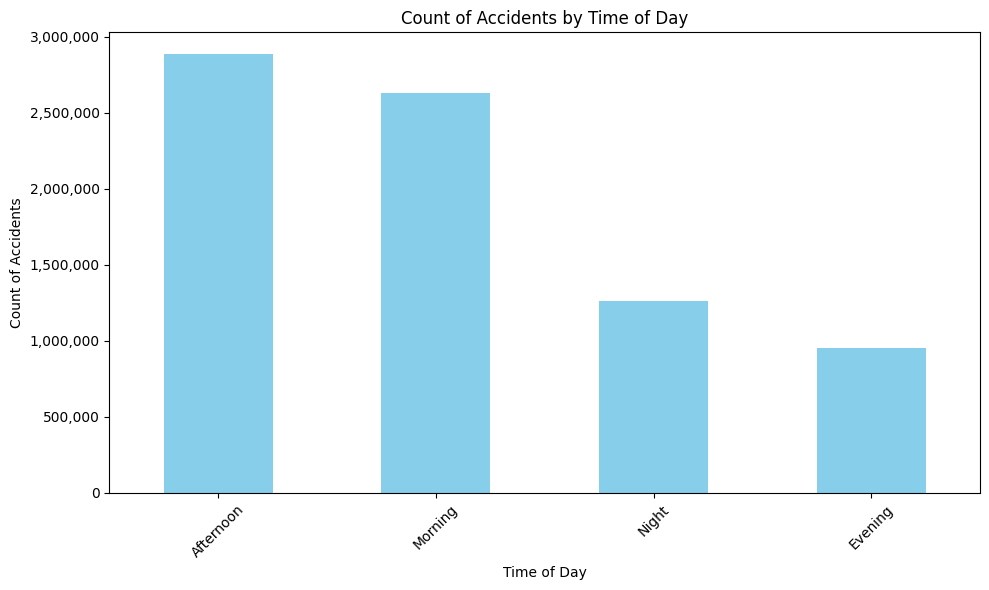

In [38]:
# Ensure 'Start_Time' is in datetime format
df['Start_Time'] = dd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract the hour from 'Start_Time'
df['hour'] = df['Start_Time'].dt.hour

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'  # For hours 21 and 24

# Apply the categorization function using Dask's map_partitions
df['time_of_day'] = df['hour'].map(categorize_time_of_day, meta=('x', 'object'))

# Count how many times each time of day appears and sort by counts in descending order
time_of_day_counts = df['time_of_day'].value_counts().compute().sort_values(ascending=False)

# Print the counts for each time of day
print("Counts of each time of day:")
print(time_of_day_counts)

# Plotting the counts
plt.figure(figsize=(10, 6))
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format y-axis with commas
plt.tight_layout()  # Adjust layout
plt.show()

<h5 style="font-size: 0.8em;">Summary of Accident Counts by Time of Day</h5>

<p style="font-size: 0.8em;"><strong>Overview of Accident Distribution:</strong></p>
<ul style="font-size: 0.8em;">
    <li><strong>Afternoon:</strong> 2,884,131 accidents</li>
    <li><strong>Morning:</strong> 2,631,665 accidents</li>
    <li><strong>Night:</strong> 1,260,209 accidents</li>
    <li><strong>Evening:</strong> 952,389 accidents</li>
</ul>

<p style="font-size: 0.8em;"><strong>Key Insights:</strong></p>
<ul style="font-size: 0.8em;">
    <li><strong>Afternoon Peak:</strong> The afternoon has the highest number of accidents, indicating increased traffic due to commuters returning home.</li>
    <li><strong>Morning Activity:</strong> The morning follows closely, aligning with the rush hour and heightened traffic congestion.</li>
    <li><strong>Nighttime Incidents:</strong> Nighttime accidents, while lower in count, may involve greater severity due to reduced visibility.</li>
    <li><strong>Evening Decline:</strong> The evening period sees the fewest accidents, likely due to reduced traffic volume.</li>
</ul>

<p style="font-size: 0.8em;"><strong>Conclusion:</strong> Most accidents occur during daytime hours, particularly in the afternoon and morning. These insights can inform traffic management strategies such as:</p>
<ul style="font-size: 0.8em;">
    <li><strong>Enhanced Enforcement:</strong> Targeting peak hours to reduce risky driving.</li>
    <li><strong>Awareness Campaigns:</strong> Promoting safe driving during high-traffic periods.</li>
    <li><strong>Infrastructure Improvements:</strong> Optimizing traffic signals and road design to enhance safety.</li>
</ul>

<p style="font-size: 0.8em;"><small>This summary highlights the critical times for accidents and can guide efforts to improve road safety.</small></p>

<hr style="border: 1px solid #ccc; margin: 20px 0;">

### Geographic Distribution of Accidents
Understanding the geographic distribution of accidents is key to identifying high-risk areas and tailoring interventions effectively. In this section, we will explore:







- **State-Level Analysis:** Identify which states have the highest and lowest accident counts, providing insights into regional differences in traffic safety.



**•	Which states had the highest and lowest number of accidents?**


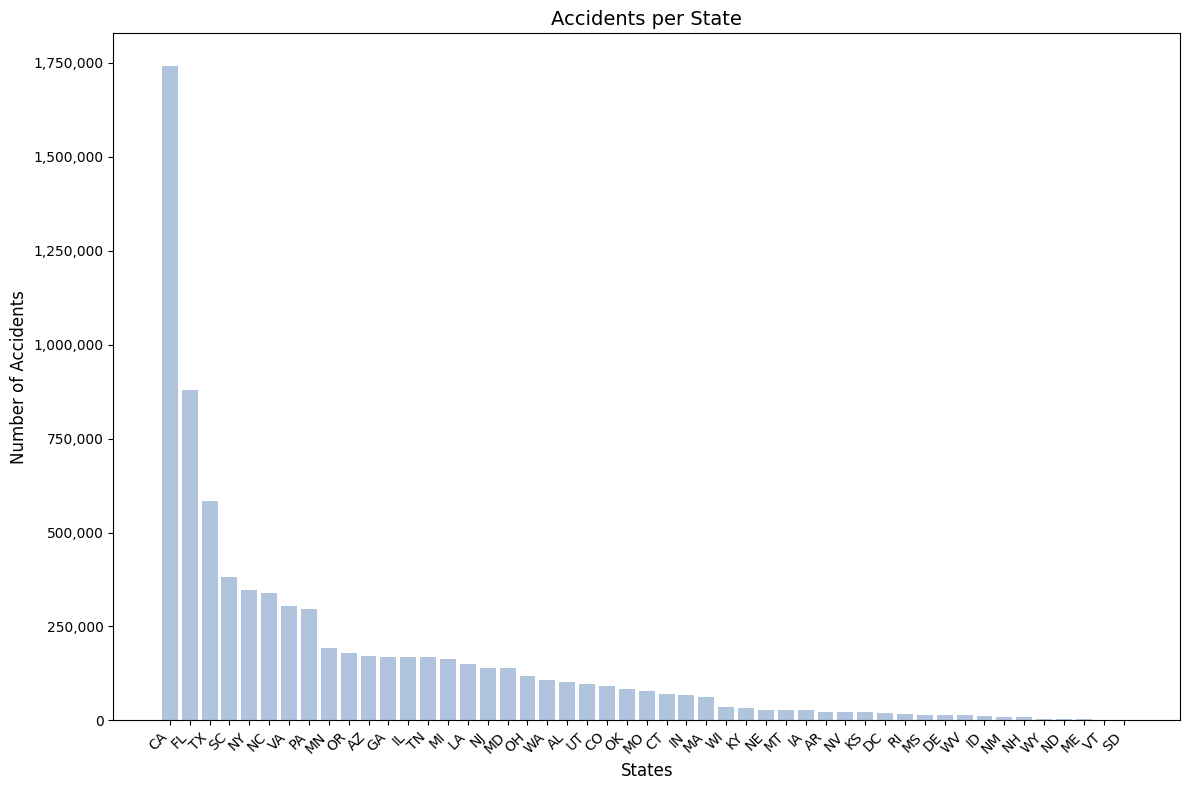

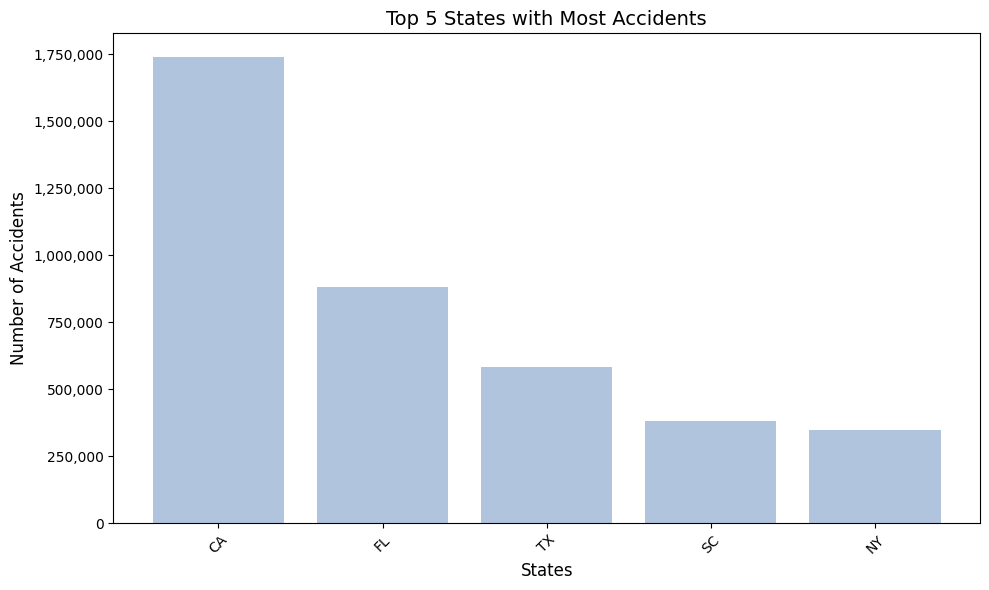

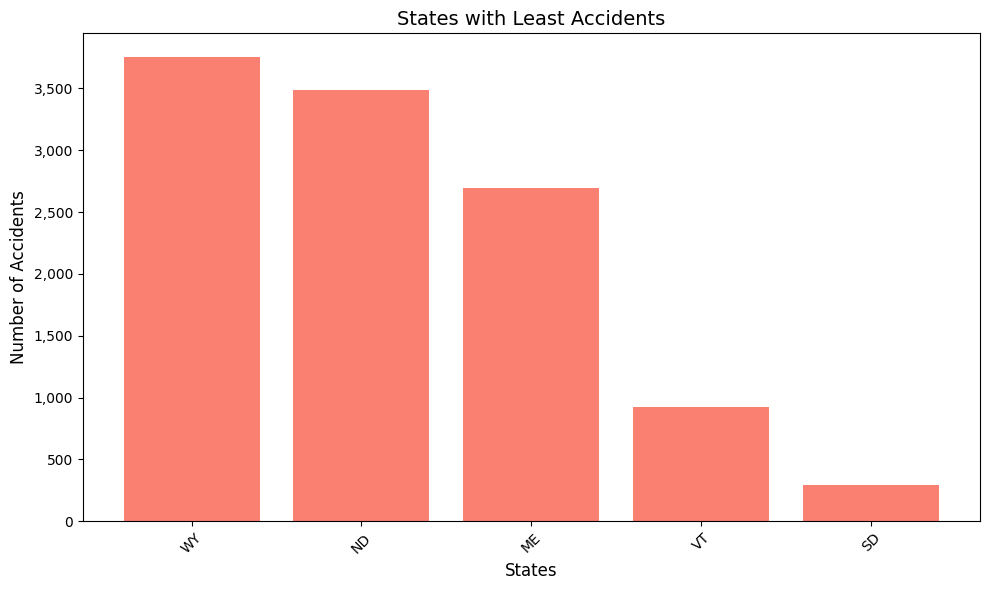

In [39]:
# Check if 'State' exists in the DataFrame
if 'State' not in df.columns:
    raise ValueError("The column 'State' does not exist in the DataFrame.")

# Get unique state names and check for duplicates
unique_states = df['State'].unique().compute()
has_duplicates = len(unique_states) != len(set(unique_states))

# Count accidents for each state using groupby and sort in descending order
state_counts = df['State'].value_counts().compute().sort_values(ascending=False)

# Get the top 5 and least 5 states
top_5_states = state_counts.head(5)
least_5_states = state_counts.tail(5)

# Print the total number of accidents
# total_accidents = state_counts.sum()
# print(f"Total number of accidents: {total_accidents}")

# Print the top 5 and least 5 states
# print("Top 5 States with the Most Accidents:")
# for state, count in top_5_states.items():
#     print(f"{state}: {count}")

# print("\nBottom 5 States with the Least Accidents:")
# for state, count in least_5_states.items():
#     print(f"{state}: {count}")

# Plotting the results for all states
plt.figure(figsize=(12, 8))
plt.bar(state_counts.index, state_counts.values, color='lightsteelblue')
plt.title('Accidents per State', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting for Top 5 States
plt.figure(figsize=(10, 6))
plt.bar(top_5_states.index, top_5_states.values, color='lightsteelblue')
plt.title('Top 5 States with Most Accidents', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for Least 5 States
plt.figure(figsize=(10, 6))
plt.bar(least_5_states.index, least_5_states.values, color='salmon')
plt.title('States with Least Accidents', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h5 style="font-size: 0.8em;">Analysis of Accident Data by State</h5>

<p style="font-size: 0.8em;"><strong>States with the Most Incidents:</strong></p>
<ul style="font-size: 0.8em;">
    <li><strong>California (CA):</strong> 1,741,433 incidents</li>
    <li><strong>Florida (FL):</strong> 880,192 incidents</li>
    <li><strong>Texas (TX):</strong> 582,837 incidents</li>
    <li><strong>South Carolina (SC):</strong> 382,557 incidents</li>
    <li><strong>New York (NY):</strong> 347,960 incidents</li>
</ul>

<p style="font-size: 0.8em;"><strong>States with the Least Incidents:</strong></p>
<ul style="font-size: 0.8em;">
    <li><strong>Wyoming (WY):</strong> 3,757 incidents</li>
    <li><strong>North Dakota (ND):</strong> 3,487 incidents</li>
    <li><strong>Maine (ME):</strong> 2,698 incidents</li>
    <li><strong>Vermont (VT):</strong> 926 incidents</li>
    <li><strong>South Dakota (SD):</strong> 289 incidents</li>
</ul>

<p style="font-size: 0.8em;"><small>This analysis highlights the significant disparities in the number of accidents across different states, with California, Florida, Texas, South Carolina, and New York experiencing the highest incidents, while Wyoming, North Dakota, Maine, Vermont, and South Dakota report the fewest.</small></p>

<hr style="border: 1px solid #ccc; margin: 20px 0;">

- **City-Level Insights:** Dive deeper into urban areas to discover which cities experience the most accidents. This data can help municipalities target their traffic safety initiatives more effectively.



**•	Which cities have the highest and lower number of accidents?**


The first 5 cities with the most incidents are:
Miami (186917)
Houston (169609)
Los Angeles (156491)
Charlotte (138652)
Dallas (130939)

The cities with the least incidents are:
Willow City (1)
Window Rock (1)
Wingina (1)
Yeso (1)
Young (1)

Has duplicates: <dask_expr.expr.Scalar: expr=(DropDuplicates(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=Assign(frame=ReadParquetFSSpec(c4b3c72)))))))['City'], split_every=False)).count() < 7728394, dtype=bool>


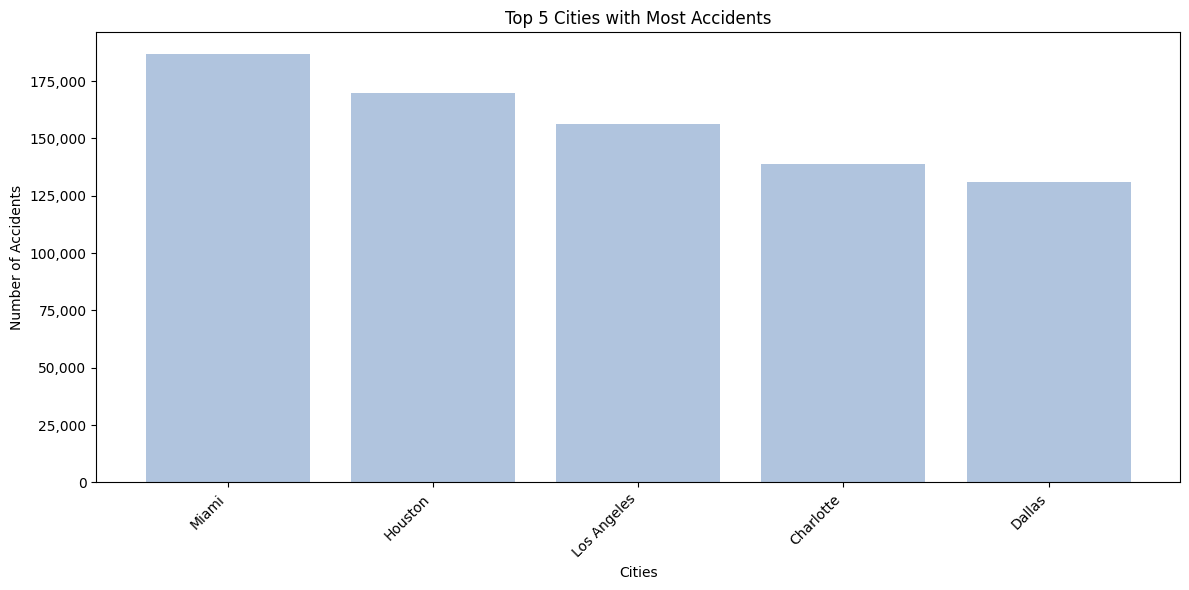

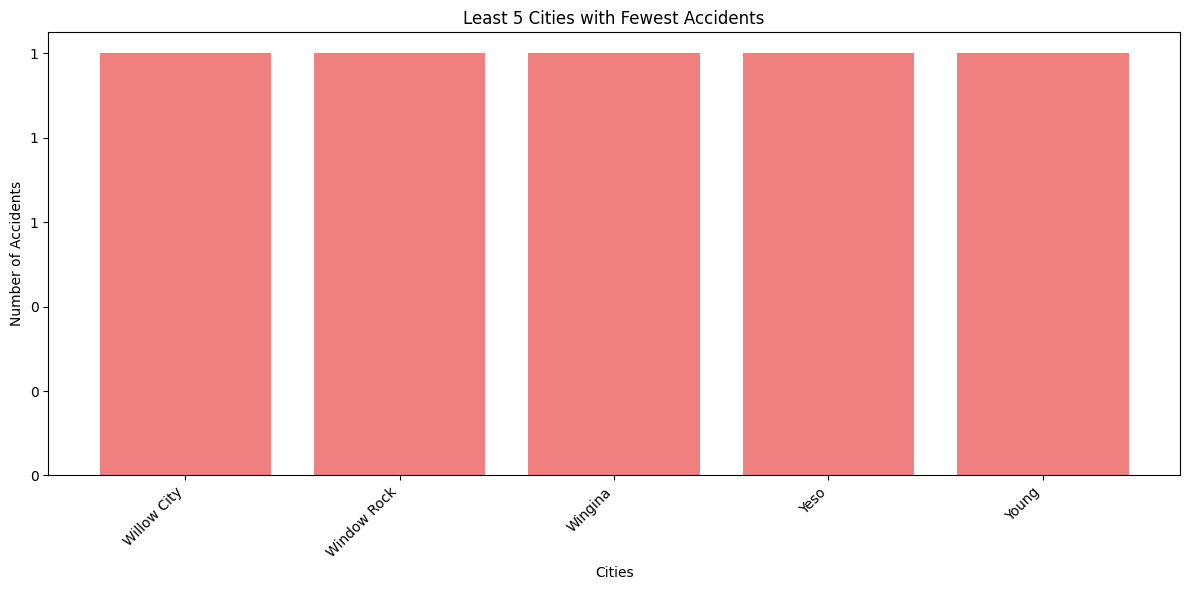

In [40]:
# Count accidents for each city
city_counts = df['City'].value_counts().compute()  # Get counts directly

# Sort the city counts in descending order
sorted_city_counts = city_counts.sort_values(ascending=False)

# Get the top 5 cities with the most incidents
top_5_cities = sorted_city_counts.head(5)

# Get the bottom 5 cities with the least incidents
least_5_cities = sorted_city_counts.tail(5)

# Print the results
print("The first 5 cities with the most incidents are:")
for city, count in top_5_cities.items():
    print(f"{city} ({count})")

print("\nThe cities with the least incidents are:")
for city, count in least_5_cities.items():
    print(f"{city} ({count})")

# Check for duplicates
has_duplicates = df['City'].nunique() < len(df['City'])

# Print sorted results
print("\nHas duplicates:", has_duplicates)

# Plotting the top 5 cities
plt.figure(figsize=(12, 6))
plt.bar(top_5_cities.index, top_5_cities.values, color='lightsteelblue')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.title('Top 5 Cities with Most Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the least 5 cities
plt.figure(figsize=(12, 6))
plt.bar(least_5_cities.index, least_5_cities.values, color='lightcoral')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.title('Least 5 Cities with Fewest Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<hr style="border: 1px solid #ccc; margin: 20px 0;">

•	Which regions or states have the highest accident severity, and what factors contribute to more serious accidents in these areas?

Note: This question focuses on states with the highest accident severity (level 4 or fatal) and differs from the analysis of states with the most accidents overall, regardless of severity.

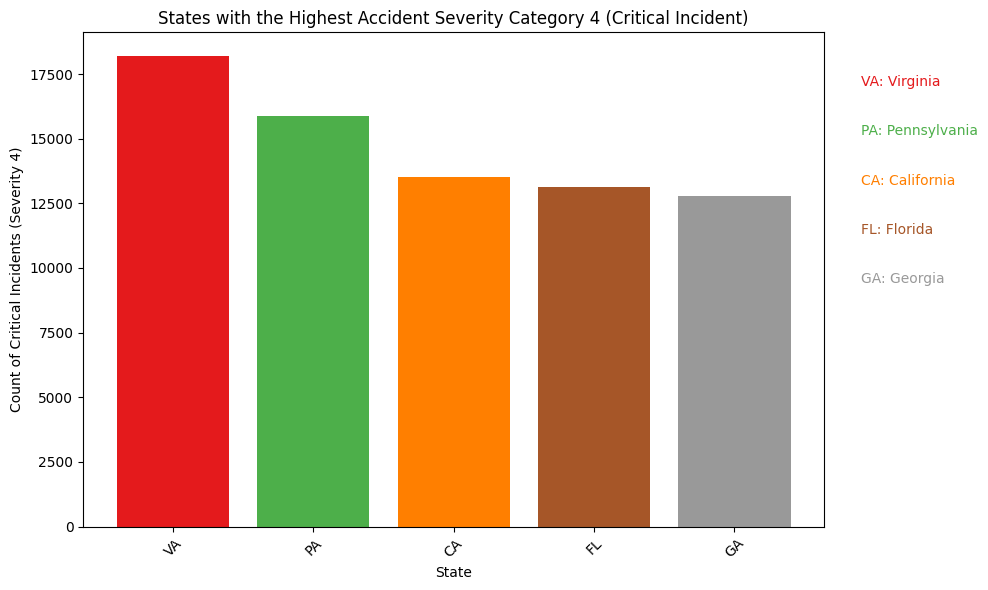

In [41]:
# Dictionary to map state abbreviations to full names
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
# Group by 'State' and 'Severity' and count the occurrences of each
state_severity_counts = df.groupby(['State', 'Severity']).size()

# Compute the result
result = state_severity_counts.compute()

# Convert to a Pandas DataFrame for easier manipulation
result_df = result.reset_index(name='Count')

# Filter the DataFrame for Severity 4 (Critical Incidents)
severity_4_df = result_df[result_df['Severity'] == 4]

# Sort by 'Count' and get the top 5 states
top_5_states_severity_4 = severity_4_df.sort_values(by='Count', ascending=False).head(5)

# Assign different colors to each state using the updated method
colors = plt.colormaps.get_cmap('Set1')(np.linspace(0, 1, len(top_5_states_severity_4)))

# Plot the top 5 states with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_states_severity_4['State'], top_5_states_severity_4['Count'], color=colors)

# Set plot title and labels
plt.title('States with the Highest Accident Severity Category 4 (Critical Incident)')
plt.xlabel('State')
plt.ylabel('Count of Critical Incidents (Severity 4)')
plt.xticks(rotation=45)

# Create the legend based on the top 5 states
state_legend = {abbr: state_names[abbr] for abbr in top_5_states_severity_4['State']}

# Create colored legend
for i, bar in enumerate(bars):
    plt.text(1.05, 0.9 - (i * 0.1), f"{top_5_states_severity_4['State'].iloc[i]}: {state_legend[top_5_states_severity_4['State'].iloc[i]]}",
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', color=bar.get_facecolor())

# Add space for the legend
plt.tight_layout()

# Show plot
plt.show()


<hr style="border: 1px solid #ccc; margin: 20px 0;">

**Cluster Map Visualization**: Generate a cluster map that groups areas with high and low accident concentrations across the U.S. This visual tool will highlight accident clusters, allowing for the identification of accident-prone regions. By clustering similar areas based on accident frequency, it facilitates targeted strategic planning for traffic safety measures and resource allocation.

<hr style="border: 1px solid #ccc; margin: 20px 0;">

### Conclusion
By conducting a thorough exploratory analysis combined with geographic insights, we aim to build a comprehensive understanding of traffic accidents in the U.S. This information will provide a solid foundation for deeper analyses in subsequent sections, where we will explore the impact of external factors, severity, and trends over time.